In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import pandas as pd
import yaml
import numpy as np
import os
from PIL import Image
import glob
#%matplotlib inline

In [2]:
# Select map
MAP_NAME = "Monza_map"

In [3]:
csv_files = glob.glob(f'/home/weins/sim_ws/csv/*monza*', recursive=False)
for i, x in enumerate(csv_files):
    print(f"[{i}]: {x}")

[0]: /home/weins/sim_ws/csv/mpc_monza_safe_final_out.csv
[1]: /home/weins/sim_ws/csv/traj_race_monza_v2.csv
[2]: /home/weins/sim_ws/csv/monza_mpc_final_out.csv
[3]: /home/weins/sim_ws/csv/trajrace_pp_monza.csv
[4]: /home/weins/sim_ws/csv/mpc_monza_hp_final_out.csv
[5]: /home/weins/sim_ws/csv/monza_pp_final_out.csv
[6]: /home/weins/sim_ws/csv/mpc_monza_hp_controls_out.csv
[7]: /home/weins/sim_ws/csv/mpc_monza_fast_controls_out.csv
[8]: /home/weins/sim_ws/csv/pp_monza_controls_out.csv
[9]: /home/weins/sim_ws/csv/mpc_monza_fast_final_out.csv
[10]: /home/weins/sim_ws/csv/mpc_monza_safe_controls_out.csv
[11]: /home/weins/sim_ws/csv/pp_monza_final_out.csv
[12]: /home/weins/sim_ws/csv/traj_race_monza.csv


In [4]:
monza_length = len(pd.read_csv(csv_files[1], sep=','))+1
monza_length

2944

In [5]:
monza_pp_length = len(pd.read_csv(csv_files[3], sep=','))+1
monza_pp_length

884

## MPC Configurazione High Performance

In [6]:
# Select file index
row = 6

In [7]:
raw_data = pd.read_csv(csv_files[row], sep=',')
raw_data

,x,y,theta,speed,accel
0,2.819640,33.829072,-0.000174,12.032588,3.000000
1,2.809749,33.711677,0.002136,12.097867,2.175953
2,2.791862,33.569804,0.014754,12.102449,2.649538
3,2.789551,33.476610,0.005817,12.101833,0.132201
4,2.779212,33.358914,0.008500,12.123576,0.724774
...,...,...,...,...,...
2939,2.877259,34.532131,-0.011813,11.836968,0.078534
2940,2.867785,34.415070,-0.010170,11.870052,1.102800
2941,2.848729,34.180827,-0.006788,11.940289,2.341244
2942,2.833687,34.039004,0.012346,11.954168,2.481188


### PP

In [6]:
raw_data_pp = pd.read_csv(csv_files[11], sep=',')
raw_data_pp

,x,y,theta,speed,accel,dist,energy,theta_map
0,2.754831,33.216434,-0.005779,11.647627,1.177266,0.678880,-3.961313,3.054638
1,2.727023,32.874898,-0.002998,11.688478,1.175811,0.022477,-4.222969,3.054239
2,2.669737,32.189092,0.004286,11.729138,1.179894,0.210479,-4.282087,3.054106
3,2.629391,31.730019,0.008041,11.769797,1.183977,0.171271,-4.341512,3.054018
4,2.587599,31.269446,0.007697,11.810456,1.130772,0.134063,-4.177334,3.053958
...,...,...,...,...,...,...,...,...
877,3.015882,36.244395,0.005684,11.383904,1.286352,0.139016,-4.288562,3.055640
878,2.967648,35.690060,0.006734,11.429564,1.291501,0.195564,-4.351372,3.055466
879,2.927981,35.244501,0.004144,11.475224,1.225903,0.143130,-3.921014,3.055288
880,2.878172,34.684888,-0.001462,11.518397,1.227751,0.205153,-3.728682,3.055090


In [7]:
raw_data_pp.loc[0, "dist"] = raw_data_pp.dist.mean()
(raw_data_pp.dist.min(), raw_data_pp.dist.max())

(0.015007024201505, 0.2799856079509733)

In [10]:
# Image resolution
size = 20 #40

# Select third dimention column index (color)
# [2] angle
# [3] velocity
# [4] acceleration
i = 'theta'

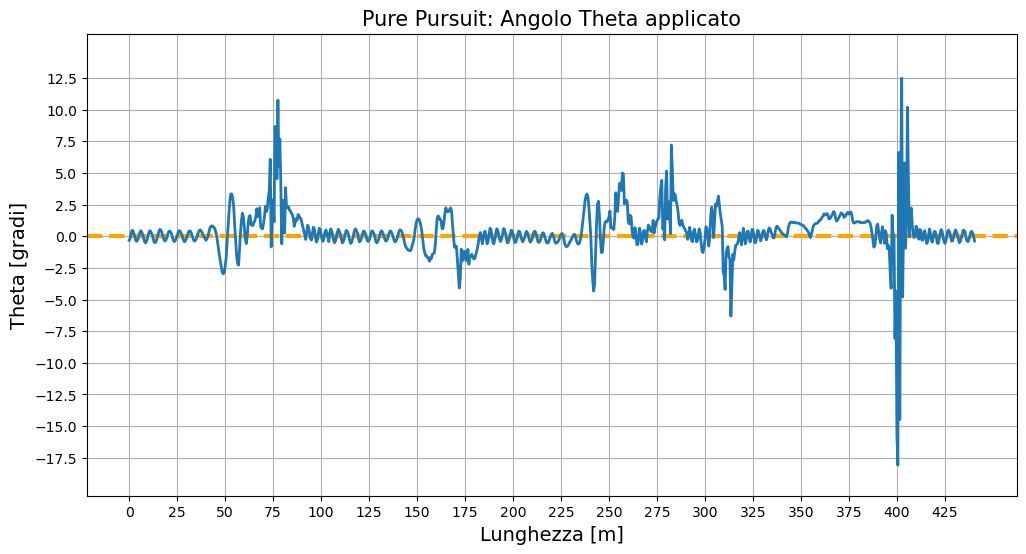

In [18]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)


# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
distance_per_waypoint = 0.5
monza_length = np.arange(0, (monza_pp_length-2) * distance_per_waypoint, distance_per_waypoint)

# Assuming `i` is the index of the column containing theta values
theta_values = raw_data_pp.loc[:, i].to_numpy()*180/np.pi

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("Pure Pursuit: Angolo Theta applicato", fontsize=15)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
plt.plot(monza_length, theta_values, linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Theta [gradi]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, monza_length[-1], 25), fontsize=10)
plt.yticks(np.arange(-17.5, 12.6, 2.5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(-20.5, 16)
# Save the figure as an image file
plt.savefig('MPC and PP/PP Theta Monza.png', dpi=300, bbox_inches='tight')

plt.show()

### MPC HP

In [19]:
# Image resolution
size = 20 #40

# Select third dimention column index (color)
# [2] angle
# [3] velocity
# [4] acceleration
i = 'theta'

In [20]:
monza_length = len(pd.read_csv(csv_files[row], sep=','))
monza_length

2944

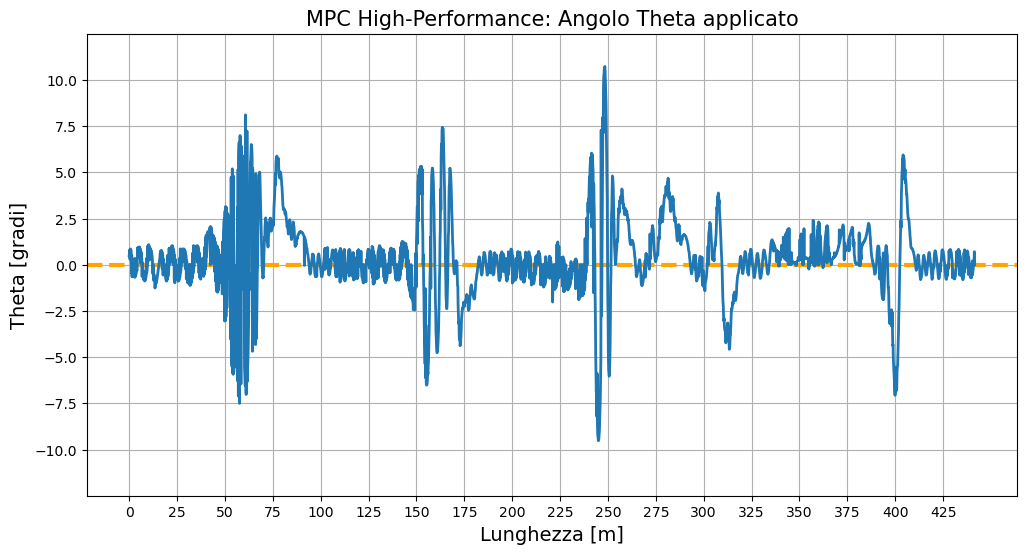

In [80]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)


# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = monza_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

# Assuming `i` is the index of the column containing theta values
theta_values = raw_data.loc[:, i].to_numpy()*180/np.pi

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC High-Performance: Angolo Theta applicato", fontsize=15)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
plt.plot(length, theta_values, linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Theta [gradi]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1], 25), fontsize=10)
plt.yticks(np.arange(-10, 11, 2.5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(-12.5, 12.5)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC High Performance Theta Monza.png', dpi=300, bbox_inches='tight')

plt.show()

In [21]:
original = pd.read_csv(csv_files[1], sep=',', names=['x', 'y', 'theta', 'speed'])
original

,x,y,theta,speed
0,2.811887,33.892912,3.054638,12.547317
1,2.798863,33.743580,3.054567,12.562538
2,2.785829,33.594237,3.054500,12.577760
3,2.772783,33.444884,3.054437,12.592982
4,2.759728,33.295520,3.054377,12.608203
...,...,...,...,...
2939,2.863912,34.490694,3.054919,12.330430
2940,2.850922,34.341262,3.054851,12.330430
2941,2.837922,34.191821,3.054782,12.330430
2942,2.824910,34.042371,3.054711,12.330430


In [22]:
raw_data[(raw_data['theta'] == 0.0) & (raw_data['speed'] == 0.0) & (raw_data['accel'] == 0.0)] = np.nan
raw_data

,x,y,theta,speed,accel
0,2.819640,33.829072,-0.000174,12.032588,3.000000
1,2.809749,33.711677,0.002136,12.097867,2.175953
2,2.791862,33.569804,0.014754,12.102449,2.649538
3,2.789551,33.476610,0.005817,12.101833,0.132201
4,2.779212,33.358914,0.008500,12.123576,0.724774
...,...,...,...,...,...
2939,2.877259,34.532131,-0.011813,11.836968,0.078534
2940,2.867785,34.415070,-0.010170,11.870052,1.102800
2941,2.848729,34.180827,-0.006788,11.940289,2.341244
2942,2.833687,34.039004,0.012346,11.954168,2.481188


In [23]:
monza_length = len(pd.read_csv(csv_files[row], sep=','))
monza_length

2944

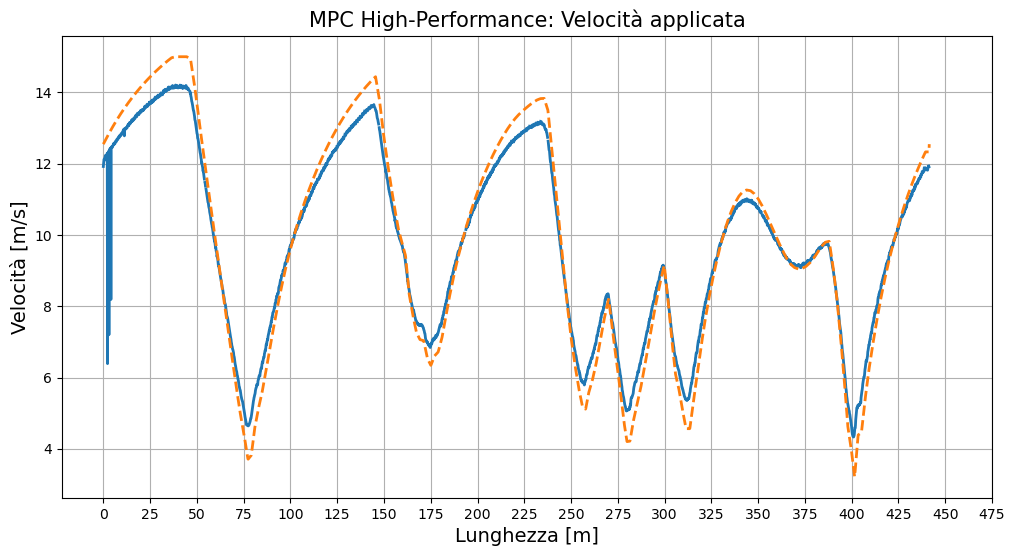

In [84]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)



# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline

# Assuming `i` is the index of the column containing theta values
#theta_values = transformed_data.loc[:, i].to_numpy()  # Replace with your actual theta values

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC High-Performance: Velocità applicata", fontsize=15)
#plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = monza_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)
plt.plot(length, raw_data.loc[:, 'speed'].to_numpy(), linewidth=2)
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

plt.plot(length, original['speed'].to_numpy(), linestyle='--', linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Velocità [m/s]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1]+50, 25), fontsize=10)
plt.yticks(fontsize=10)  # Increase y-axis tick font size
#plt.ylim(theta_values.min() - 0.05, theta_values.max() + 0.03)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC High Performance Speed Monza.png', dpi=300, bbox_inches='tight')

plt.show()

## MPC Configurazione Fast

In [85]:
csv_files = glob.glob(f'/home/weins/sim_ws/csv/*monza*', recursive=False)
for i, x in enumerate(csv_files):
    print(f"[{i}]: {x}")

[0]: /home/weins/sim_ws/csv/mpc_monza_safe_final_out.csv
[1]: /home/weins/sim_ws/csv/traj_race_monza_v2.csv
[2]: /home/weins/sim_ws/csv/monza_mpc_final_out.csv
[3]: /home/weins/sim_ws/csv/trajrace_pp_monza.csv
[4]: /home/weins/sim_ws/csv/mpc_monza_hp_final_out.csv
[5]: /home/weins/sim_ws/csv/monza_pp_final_out.csv
[6]: /home/weins/sim_ws/csv/mpc_monza_hp_controls_out.csv
[7]: /home/weins/sim_ws/csv/mpc_monza_fast_controls_out.csv
[8]: /home/weins/sim_ws/csv/pp_monza_controls_out.csv
[9]: /home/weins/sim_ws/csv/mpc_monza_fast_final_out.csv
[10]: /home/weins/sim_ws/csv/mpc_monza_safe_controls_out.csv
[11]: /home/weins/sim_ws/csv/pp_monza_final_out.csv
[12]: /home/weins/sim_ws/csv/traj_race_monza.csv


In [86]:
# Select file index
row = 7

In [87]:
raw_data = pd.read_csv(csv_files[row], sep=',')
raw_data

,x,y,theta,speed,accel
0,2.816212,33.846572,0.016819,12.246661,3.000000
1,2.805060,33.727260,0.016729,12.313973,2.243720
2,2.788222,33.540381,0.011977,12.336134,1.328450
3,2.782438,33.488336,0.015367,12.330680,0.556891
4,2.770989,33.368696,0.014304,12.354756,0.802538
...,...,...,...,...,...
2939,2.870294,34.442145,0.011157,12.127437,1.485281
2940,2.868306,34.374482,0.016638,12.105566,0.929014
2941,2.849009,34.204104,0.013933,12.123853,-0.119476
2942,2.838190,34.084993,0.015456,12.156661,1.093621


In [88]:
# Image resolution
size = 20 #40

# Select third dimention column index (color)
# [2] angle
# [3] velocity
# [4] acceleration
i = 'theta'

In [89]:
monza_length = len(pd.read_csv(csv_files[row], sep=','))
monza_length

2944

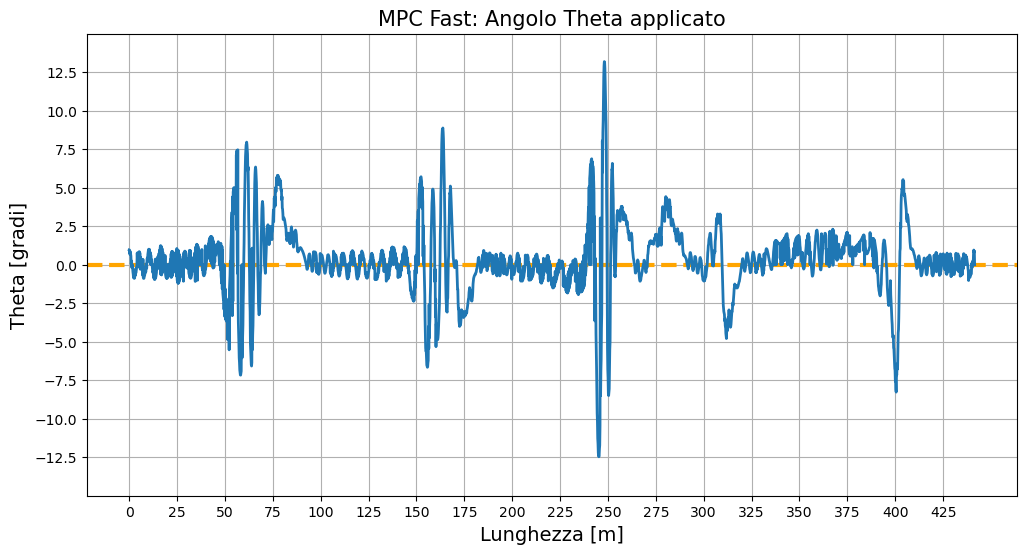

In [90]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)

# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = monza_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

# Assuming `i` is the index of the column containing theta values
theta_values = raw_data.loc[:, i].to_numpy()*180/np.pi

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC Fast: Angolo Theta applicato", fontsize=15)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
plt.plot(length, theta_values, linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Theta [gradi]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1], 25), fontsize=10)
plt.yticks(np.arange(-12.5, 15, 2.5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(-15, 15)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC Fast Theta Monza.png', dpi=300, bbox_inches='tight')

plt.show()

In [91]:
original = pd.read_csv(csv_files[1], sep=',', names=['x', 'y', 'theta', 'speed'])
original

,x,y,theta,speed
0,2.811887,33.892912,3.054638,12.547317
1,2.798863,33.743580,3.054567,12.562538
2,2.785829,33.594237,3.054500,12.577760
3,2.772783,33.444884,3.054437,12.592982
4,2.759728,33.295520,3.054377,12.608203
...,...,...,...,...
2939,2.863912,34.490694,3.054919,12.330430
2940,2.850922,34.341262,3.054851,12.330430
2941,2.837922,34.191821,3.054782,12.330430
2942,2.824910,34.042371,3.054711,12.330430


In [92]:
raw_data[(raw_data['theta'] == 0.0) & (raw_data['speed'] == 0.0) & (raw_data['accel'] == 0.0)] = np.nan
raw_data

,x,y,theta,speed,accel
0,2.816212,33.846572,0.016819,12.246661,3.000000
1,2.805060,33.727260,0.016729,12.313973,2.243720
2,2.788222,33.540381,0.011977,12.336134,1.328450
3,2.782438,33.488336,0.015367,12.330680,0.556891
4,2.770989,33.368696,0.014304,12.354756,0.802538
...,...,...,...,...,...
2939,2.870294,34.442145,0.011157,12.127437,1.485281
2940,2.868306,34.374482,0.016638,12.105566,0.929014
2941,2.849009,34.204104,0.013933,12.123853,-0.119476
2942,2.838190,34.084993,0.015456,12.156661,1.093621


In [93]:
monza_length = len(pd.read_csv(csv_files[row], sep=','))
monza_length

2944

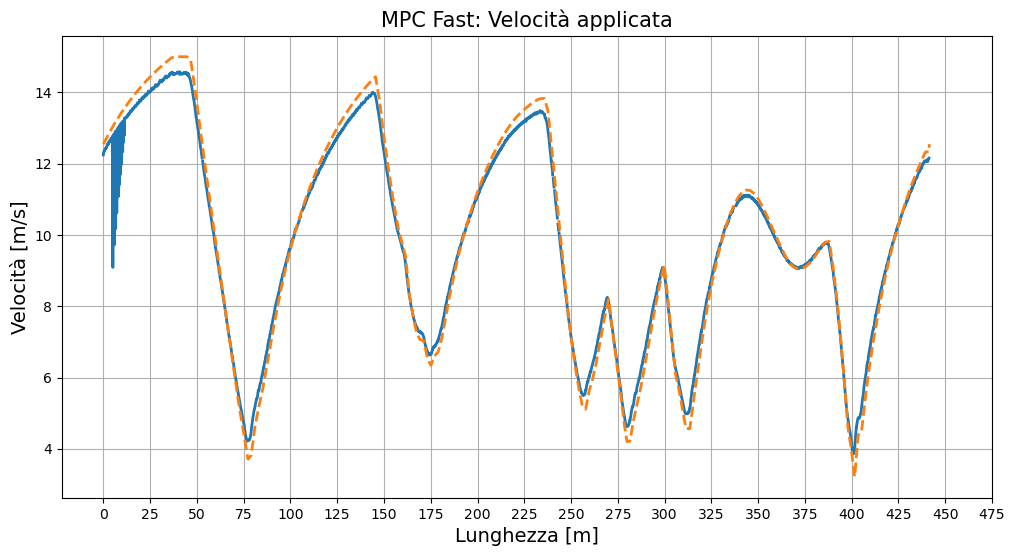

In [94]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)



# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline

# Assuming `i` is the index of the column containing theta values
#theta_values = transformed_data.loc[:, i].to_numpy()  # Replace with your actual theta values

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC Fast: Velocità applicata", fontsize=15)
#plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = monza_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)
plt.plot(length, raw_data.loc[:, 'speed'].to_numpy(), linewidth=2)
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

plt.plot(length, original['speed'].to_numpy(), linestyle='--', linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Velocità [m/s]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1]+50, 25), fontsize=10)
plt.yticks(fontsize=10)  # Increase y-axis tick font size
#plt.ylim(theta_values.min() - 0.05, theta_values.max() + 0.03)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC Fast Speed Monza.png', dpi=300, bbox_inches='tight')

plt.show()

## MPC Configurazione Safe

In [95]:
csv_files = glob.glob(f'/home/weins/sim_ws/csv/*monza*', recursive=False)
for i, x in enumerate(csv_files):
    print(f"[{i}]: {x}")

[0]: /home/weins/sim_ws/csv/mpc_monza_safe_final_out.csv
[1]: /home/weins/sim_ws/csv/traj_race_monza_v2.csv
[2]: /home/weins/sim_ws/csv/monza_mpc_final_out.csv
[3]: /home/weins/sim_ws/csv/trajrace_pp_monza.csv
[4]: /home/weins/sim_ws/csv/mpc_monza_hp_final_out.csv
[5]: /home/weins/sim_ws/csv/monza_pp_final_out.csv
[6]: /home/weins/sim_ws/csv/mpc_monza_hp_controls_out.csv
[7]: /home/weins/sim_ws/csv/mpc_monza_fast_controls_out.csv
[8]: /home/weins/sim_ws/csv/pp_monza_controls_out.csv
[9]: /home/weins/sim_ws/csv/mpc_monza_fast_final_out.csv
[10]: /home/weins/sim_ws/csv/mpc_monza_safe_controls_out.csv
[11]: /home/weins/sim_ws/csv/pp_monza_final_out.csv
[12]: /home/weins/sim_ws/csv/traj_race_monza.csv


In [96]:
# Select file index
row = 10 #0

In [97]:
raw_data = pd.read_csv(csv_files[row], sep=',')
raw_data

,x,y,theta,speed,accel
0,2.803333,33.850772,-0.009248,11.143289,10.0
1,2.796140,33.733537,-0.012098,11.154585,10.0
2,2.775202,33.526079,-0.013250,11.183520,10.0
3,2.765950,33.417569,-0.013698,11.197168,10.0
4,2.753778,33.229834,-0.000994,1.628395,10.0
...,...,...,...,...,...
2939,2.861945,34.496347,0.003244,11.064003,10.0
2940,2.842081,34.281715,-0.000432,11.090647,10.0
2941,2.832244,34.174192,-0.002712,11.103645,10.0
2942,0.000000,0.000000,0.000000,0.000000,0.0


In [98]:
monza_length = len(pd.read_csv(csv_files[row], sep=','))
monza_length

2944

In [99]:
# Image resolution
size = 20 #40

# Select third dimention column index (color)
# [2] angle
# [3] velocity
# [4] acceleration
i = 'theta'

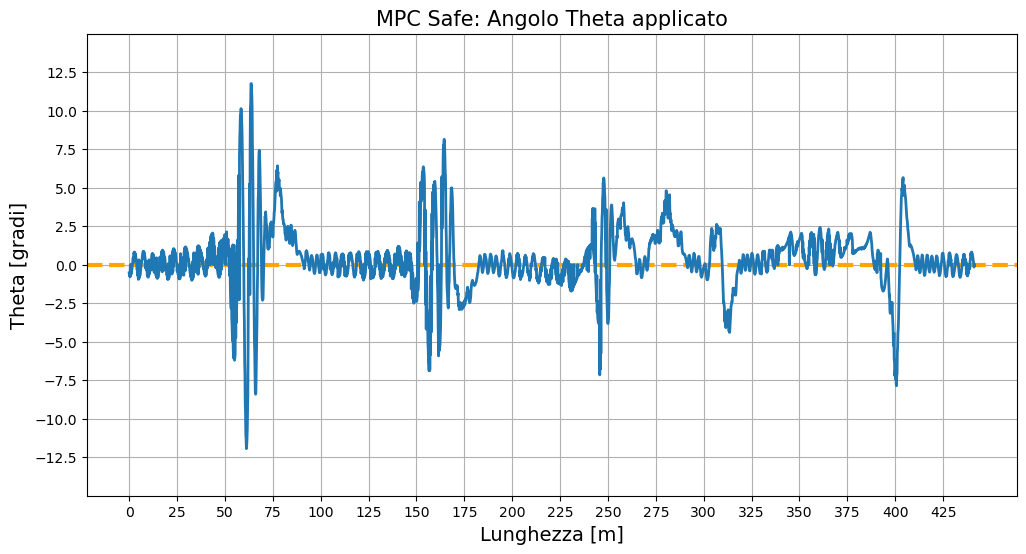

In [100]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)

# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = monza_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

# Assuming `i` is the index of the column containing theta values
theta_values = raw_data.loc[:, i].to_numpy()*180/np.pi

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC Safe: Angolo Theta applicato", fontsize=15)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
plt.plot(length, theta_values, linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Theta [gradi]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1], 25), fontsize=10)
plt.yticks(np.arange(-12.5, 15, 2.5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(-15, 15)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC Safe Theta Monza.png', dpi=300, bbox_inches='tight')

plt.show()

In [101]:
original = pd.read_csv(csv_files[1], sep=',', names=['x', 'y', 'theta', 'speed'])
original

,x,y,theta,speed
0,2.811887,33.892912,3.054638,12.547317
1,2.798863,33.743580,3.054567,12.562538
2,2.785829,33.594237,3.054500,12.577760
3,2.772783,33.444884,3.054437,12.592982
4,2.759728,33.295520,3.054377,12.608203
...,...,...,...,...
2939,2.863912,34.490694,3.054919,12.330430
2940,2.850922,34.341262,3.054851,12.330430
2941,2.837922,34.191821,3.054782,12.330430
2942,2.824910,34.042371,3.054711,12.330430


In [102]:
raw_data[(raw_data['theta'] == 0.0) & (raw_data['speed'] == 0.0) & (raw_data['accel'] == 0.0)] = np.nan
raw_data

,x,y,theta,speed,accel
0,2.803333,33.850772,-0.009248,11.143289,10.0
1,2.796140,33.733537,-0.012098,11.154585,10.0
2,2.775202,33.526079,-0.013250,11.183520,10.0
3,2.765950,33.417569,-0.013698,11.197168,10.0
4,2.753778,33.229834,-0.000994,1.628395,10.0
...,...,...,...,...,...
2939,2.861945,34.496347,0.003244,11.064003,10.0
2940,2.842081,34.281715,-0.000432,11.090647,10.0
2941,2.832244,34.174192,-0.002712,11.103645,10.0
2942,NaN,NaN,NaN,NaN,NaN


In [103]:
monza_length = len(pd.read_csv(csv_files[row], sep=','))
monza_length

2944

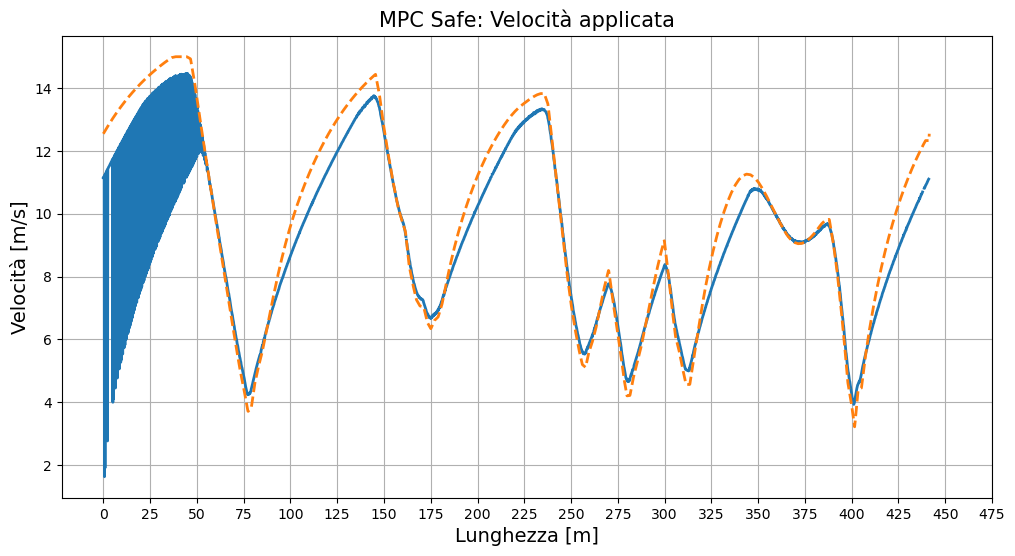

In [104]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)



# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline

# Assuming `i` is the index of the column containing theta values
#theta_values = transformed_data.loc[:, i].to_numpy()  # Replace with your actual theta values

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC Safe: Velocità applicata", fontsize=15)
#plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = monza_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)
plt.plot(length, raw_data.loc[:, 'speed'].to_numpy(), linewidth=2)
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

plt.plot(length, original['speed'].to_numpy(), linestyle='--', linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Velocità [m/s]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1]+50, 25), fontsize=10)
plt.yticks(fontsize=10)  # Increase y-axis tick font size
#plt.ylim(theta_values.min() - 0.05, theta_values.max() + 0.03)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC Safe Speed Monza.png', dpi=300, bbox_inches='tight')

plt.show()

### Velocità delle 3 config

In [8]:
csv_files = glob.glob(f'/home/weins/sim_ws/csv/*monza*', recursive=False)
for i, x in enumerate(csv_files):
    print(f"[{i}]: {x}")

[0]: /home/weins/sim_ws/csv/mpc_monza_safe_final_out.csv
[1]: /home/weins/sim_ws/csv/traj_race_monza_v2.csv
[2]: /home/weins/sim_ws/csv/monza_mpc_final_out.csv
[3]: /home/weins/sim_ws/csv/trajrace_pp_monza.csv
[4]: /home/weins/sim_ws/csv/mpc_monza_hp_final_out.csv
[5]: /home/weins/sim_ws/csv/monza_pp_final_out.csv
[6]: /home/weins/sim_ws/csv/mpc_monza_hp_controls_out.csv
[7]: /home/weins/sim_ws/csv/mpc_monza_fast_controls_out.csv
[8]: /home/weins/sim_ws/csv/pp_monza_controls_out.csv
[9]: /home/weins/sim_ws/csv/mpc_monza_fast_final_out.csv
[10]: /home/weins/sim_ws/csv/mpc_monza_safe_controls_out.csv
[11]: /home/weins/sim_ws/csv/pp_monza_final_out.csv
[12]: /home/weins/sim_ws/csv/traj_race_monza.csv


In [9]:
ref_df = pd.read_csv(csv_files[1], sep=',', names=['x', 'y', 'theta', 'speed'])
ref_df

,x,y,theta,speed
0,2.811887,33.892912,3.054638,12.547317
1,2.798863,33.743580,3.054567,12.562538
2,2.785829,33.594237,3.054500,12.577760
3,2.772783,33.444884,3.054437,12.592982
4,2.759728,33.295520,3.054377,12.608203
...,...,...,...,...
2939,2.863912,34.490694,3.054919,12.330430
2940,2.850922,34.341262,3.054851,12.330430
2941,2.837922,34.191821,3.054782,12.330430
2942,2.824910,34.042371,3.054711,12.330430


In [10]:
safe_df = pd.read_csv(csv_files[10], sep=',')
safe_df

,x,y,theta,speed,accel
0,2.803333,33.850772,-0.009248,11.143289,10.0
1,2.796140,33.733537,-0.012098,11.154585,10.0
2,2.775202,33.526079,-0.013250,11.183520,10.0
3,2.765950,33.417569,-0.013698,11.197168,10.0
4,2.753778,33.229834,-0.000994,1.628395,10.0
...,...,...,...,...,...
2939,2.861945,34.496347,0.003244,11.064003,10.0
2940,2.842081,34.281715,-0.000432,11.090647,10.0
2941,2.832244,34.174192,-0.002712,11.103645,10.0
2942,0.000000,0.000000,0.000000,0.000000,0.0


In [11]:
safe_df[(safe_df['theta'] == 0.0) & (safe_df['speed'] == 0.0) & (safe_df['accel'] == 0.0)] = np.nan
safe_df

,x,y,theta,speed,accel
0,2.803333,33.850772,-0.009248,11.143289,10.0
1,2.796140,33.733537,-0.012098,11.154585,10.0
2,2.775202,33.526079,-0.013250,11.183520,10.0
3,2.765950,33.417569,-0.013698,11.197168,10.0
4,2.753778,33.229834,-0.000994,1.628395,10.0
...,...,...,...,...,...
2939,2.861945,34.496347,0.003244,11.064003,10.0
2940,2.842081,34.281715,-0.000432,11.090647,10.0
2941,2.832244,34.174192,-0.002712,11.103645,10.0
2942,NaN,NaN,NaN,NaN,NaN


In [12]:
fast_df = pd.read_csv(csv_files[7], sep=',')
fast_df

,x,y,theta,speed,accel
0,2.816212,33.846572,0.016819,12.246661,3.000000
1,2.805060,33.727260,0.016729,12.313973,2.243720
2,2.788222,33.540381,0.011977,12.336134,1.328450
3,2.782438,33.488336,0.015367,12.330680,0.556891
4,2.770989,33.368696,0.014304,12.354756,0.802538
...,...,...,...,...,...
2939,2.870294,34.442145,0.011157,12.127437,1.485281
2940,2.868306,34.374482,0.016638,12.105566,0.929014
2941,2.849009,34.204104,0.013933,12.123853,-0.119476
2942,2.838190,34.084993,0.015456,12.156661,1.093621


In [13]:
fast_df[(fast_df['theta'] == 0.0) & (fast_df['speed'] == 0.0) & (fast_df['accel'] == 0.0)] = np.nan
fast_df

,x,y,theta,speed,accel
0,2.816212,33.846572,0.016819,12.246661,3.000000
1,2.805060,33.727260,0.016729,12.313973,2.243720
2,2.788222,33.540381,0.011977,12.336134,1.328450
3,2.782438,33.488336,0.015367,12.330680,0.556891
4,2.770989,33.368696,0.014304,12.354756,0.802538
...,...,...,...,...,...
2939,2.870294,34.442145,0.011157,12.127437,1.485281
2940,2.868306,34.374482,0.016638,12.105566,0.929014
2941,2.849009,34.204104,0.013933,12.123853,-0.119476
2942,2.838190,34.084993,0.015456,12.156661,1.093621


In [14]:
hp_df = pd.read_csv(csv_files[6], sep=',')
hp_df

,x,y,theta,speed,accel
0,2.819640,33.829072,-0.000174,12.032588,3.000000
1,2.809749,33.711677,0.002136,12.097867,2.175953
2,2.791862,33.569804,0.014754,12.102449,2.649538
3,2.789551,33.476610,0.005817,12.101833,0.132201
4,2.779212,33.358914,0.008500,12.123576,0.724774
...,...,...,...,...,...
2939,2.877259,34.532131,-0.011813,11.836968,0.078534
2940,2.867785,34.415070,-0.010170,11.870052,1.102800
2941,2.848729,34.180827,-0.006788,11.940289,2.341244
2942,2.833687,34.039004,0.012346,11.954168,2.481188


In [15]:
hp_df[(hp_df['theta'] == 0.0) & (hp_df['speed'] == 0.0) & (hp_df['accel'] == 0.0)] = np.nan
hp_df

,x,y,theta,speed,accel
0,2.819640,33.829072,-0.000174,12.032588,3.000000
1,2.809749,33.711677,0.002136,12.097867,2.175953
2,2.791862,33.569804,0.014754,12.102449,2.649538
3,2.789551,33.476610,0.005817,12.101833,0.132201
4,2.779212,33.358914,0.008500,12.123576,0.724774
...,...,...,...,...,...
2939,2.877259,34.532131,-0.011813,11.836968,0.078534
2940,2.867785,34.415070,-0.010170,11.870052,1.102800
2941,2.848729,34.180827,-0.006788,11.940289,2.341244
2942,2.833687,34.039004,0.012346,11.954168,2.481188


In [16]:
# Assuming `i` is the index of the column containing theta values
#theta_values = transformed_data.loc[:, i].to_numpy()  # Replace with your actual theta values

#%matplotlib inline
%matplotlib qt
plt.figure(figsize=(12, 6))
#plt.title("Confronti: Velocità applicata", fontsize=15)
#plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
dim = 10
num_waypoints = monza_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)[::dim]
distance_per_waypoint_pp = 0.5
length_pp = np.arange(0, ((monza_pp_length)-2) * distance_per_waypoint_pp, distance_per_waypoint_pp)[::dim]
plt.plot(length_pp, raw_data_pp.loc[::dim, 'speed'].to_numpy(), label='Pure Pursuit', linewidth=2, color="#4046ca")
plt.plot(length, ref_df.loc[::dim, 'speed'].to_numpy(), label='Raceline', linewidth=2, color="#008f5d")
plt.plot(length, hp_df.loc[::dim, 'speed'].to_numpy(), label='High Performance', linewidth=2, color="#de3d82")
plt.plot(length, fast_df.loc[::dim, 'speed'].to_numpy(), label='Fast', linewidth=2, color="#f68511")
plt.plot(length, safe_df.loc[::dim, 'speed'].to_numpy(), label='Safe', linewidth=2, color="#7e84fa")
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Velocità [m/s]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1]+50, 100), fontsize=10)
plt.yticks(np.arange(0, 20, 2.5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(0, 20)#, theta_values.min() - 0.05, theta_values.max() + 0.03)
# Save the figure as an image file

plt.legend(title='Metodi', fontsize=12, title_fontsize='14')
plt.savefig('MPC Profiles Comparisons/monza_mpc_speed_comparisons.png', dpi=300, bbox_inches='tight')
plt.show()

Angolo

In [17]:
def car_angle(df):
    def to_deg_in(x):
        return abs(x)*180/np.pi
    car_a = [0]
    i = 1
    while i < len(df):
        car_a.append(to_deg_in(df.loc[i, 'theta']) - to_deg_in(df.loc[i-1, 'theta']))
        i += 1
    s = pd.Series(car_a)
    return s[(s<180)&(s>-180)]


def to_deg(x):
    return x*180/np.pi

In [20]:
# Assuming `i` is the index of the column containing theta values
#theta_values = transformed_data.loc[:, i].to_numpy()  # Replace with your actual theta values

#%matplotlib inline
%matplotlib qt
plt.figure(figsize=(12, 6))
#plt.title("Confronti: Angolo di sterzata applicato", fontsize=15)
#plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
dim = 7
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)[::dim]
hp_theta = to_deg(hp_df.loc[::dim, 'theta'].to_numpy())
fast_theta = to_deg(fast_df.loc[::dim, 'theta'].to_numpy())
safe_theta = to_deg(safe_df.loc[::dim, 'theta'].to_numpy())
pp_theta = to_deg(raw_data_pp.loc[::dim, 'theta'].to_numpy())
ref_theta = car_angle(ref_df)[::dim].to_numpy()

distance_per_waypoint_pp = 0.5
length_pp = np.arange(0, ((monza_pp_length-2)) * distance_per_waypoint_pp, distance_per_waypoint_pp)[::dim]

plt.plot(length_pp, pp_theta, label='Pure Pursuit', linewidth=2, color="#4046ca")
#plt.plot(length, ref_theta, label='Raceline', linewidth=2, color="#008f5d")
plt.plot(length, hp_theta, label='High Performance', linewidth=2, color="#de3d82")
plt.plot(length, fast_theta, label='Fast', linewidth=2, color="#f68511")
plt.plot(length, safe_theta, label='Safe', linewidth=2, color="#7e84fa")
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Angolo $\delta$ [gradi]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1]+50, 100), fontsize=10)
plt.yticks(np.arange(-25, 26, 5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(-30, 30)
# Save the figure as an image file

plt.legend(title='Metodi', fontsize=12, title_fontsize='14', loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=5)
plt.savefig('MPC Profiles Comparisons/monza_mpc_theta_comparisons.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:

%matplotlib inline
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = monza_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

# Assuming `i` is the index of the column containing theta values
theta_values = raw_data.loc[:, i].to_numpy()*180/np.pi

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC Safe: Angolo Theta applicato", fontsize=15)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
plt.plot(length, theta_values, linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Angolo $\delta$ [gradi]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1], 25), fontsize=10)
plt.yticks(np.arange(-12.5, 15, 2.5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(-15, 15)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC Safe Theta Monza.png', dpi=300, bbox_inches='tight')

plt.show()